# Homework 10
任课老师：胡俊峰

负责助教：陈滨琪、杨礼铭

注意：仅需要提交.ipynb文件，请**不要**将下发压缩包中的其他文件一并交上。

截止日期：4月9日24点

# 0、特征工程与特征筛选
本数据集是已经整理拼接好的数据集，包含了rock, pop, rap三个音乐种类的歌曲的音频特征。

特征部分是用的Spotify的api提供的音频分析数据，已经由原音频文件特征工程得来（如果大家对音频分析感兴趣，可以去搜一下[librosa](http://librosa.org/doc/latest/index.html)包，是专业分析音频的包。12个音频特征如下: acousticness, danceability, durationms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, valence.具体含义参考[链接](https://developer.spotify.com/web-api/get-audio-features/)。

我们的目标是通过音频特征来预测歌曲的种类，但是对于音频特征来说，12个特征全部使用的效果并不好，可以通过EDA(Exploratory Data Analysis)来查看数据情况，进行初步的人工筛选，下面给出一个EDA的例子。

In [1]:
import pandas as pd
import random

import seaborn as sns
import matplotlib.pyplot as plt
import warnings

random.seed(1)
warnings.filterwarnings('ignore')
data = pd.read_csv('./data/songs.csv')

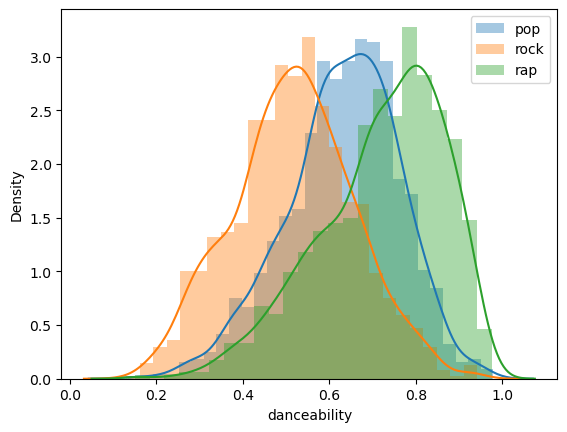

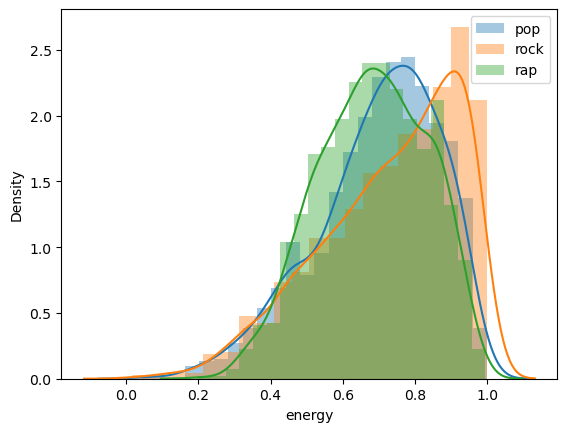

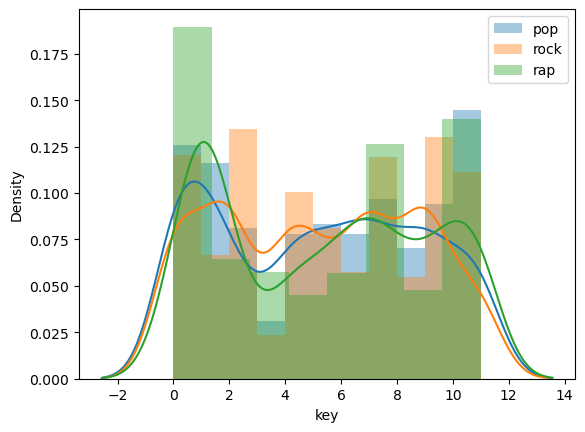

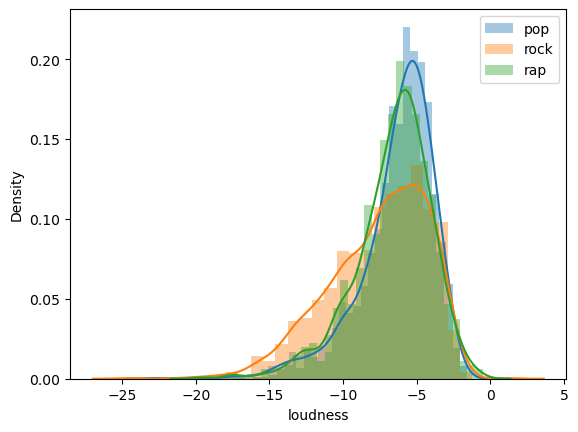

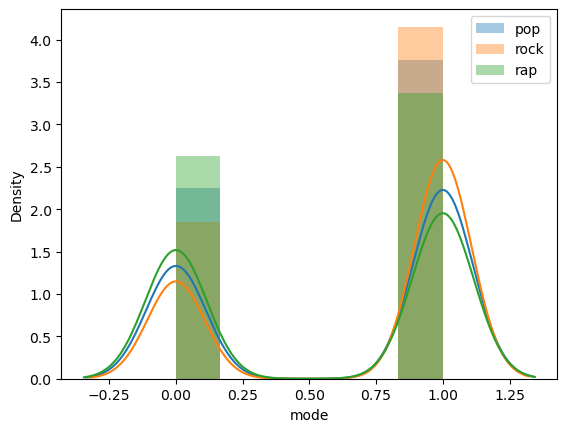

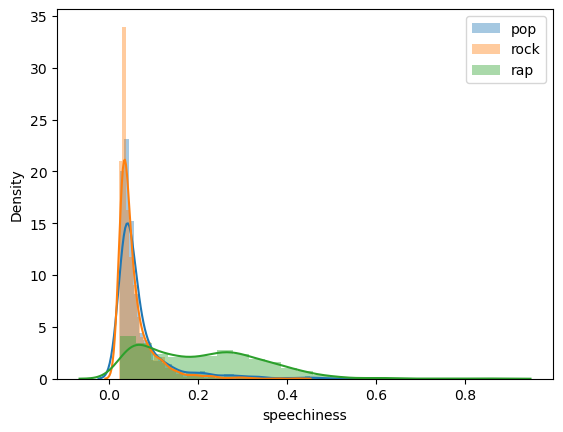

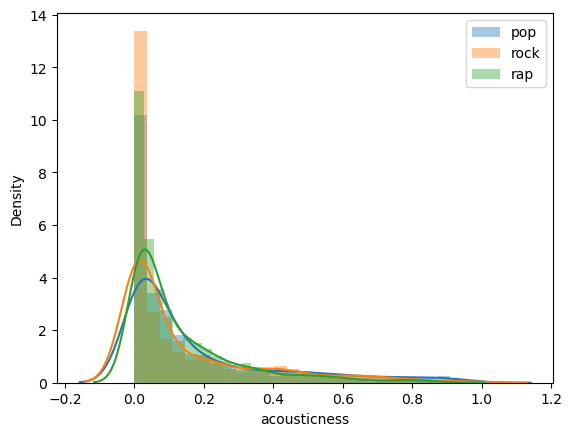

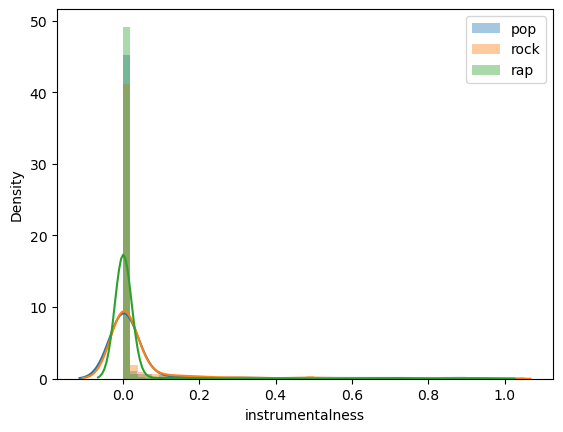

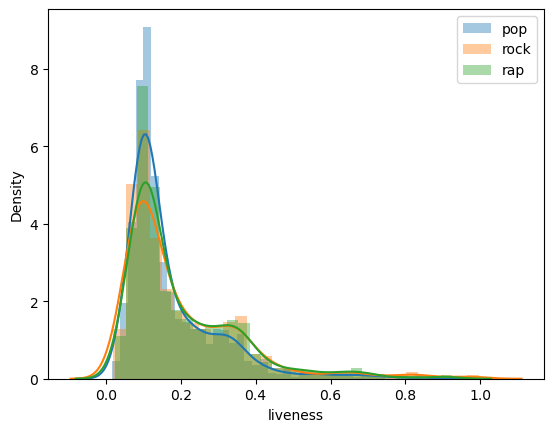

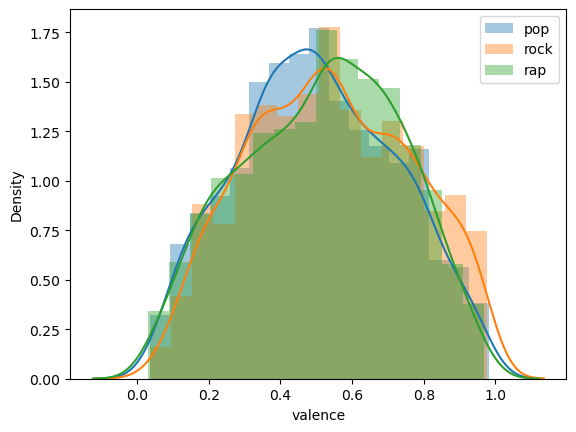

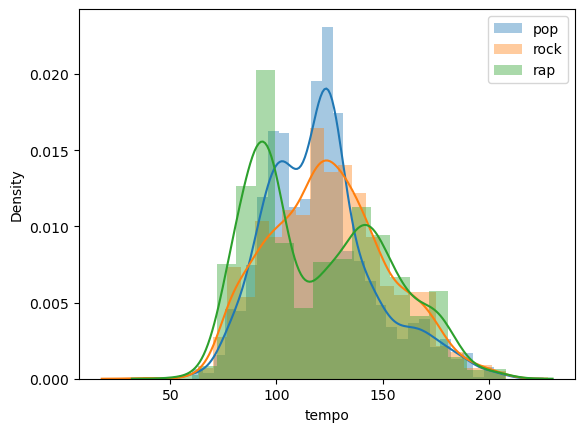

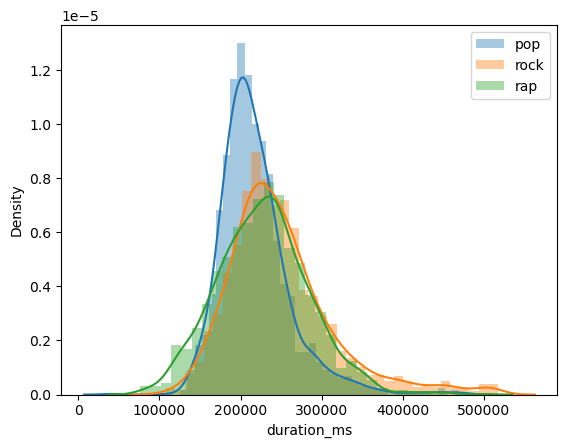

In [2]:
# 观察不同歌曲类别的每个特征的分布
def plot_density(feature):
    sns.distplot(data[data['playlist_genre']=='pop'][feature],label = 'pop')
    sns.distplot(data[data['playlist_genre']=='rock'][feature],label = 'rock')
    sns.distplot(data[data['playlist_genre']=='rap'][feature],label = 'rap')
    plt.legend()
    plt.show()
for feature in ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']:
       plot_density(feature)

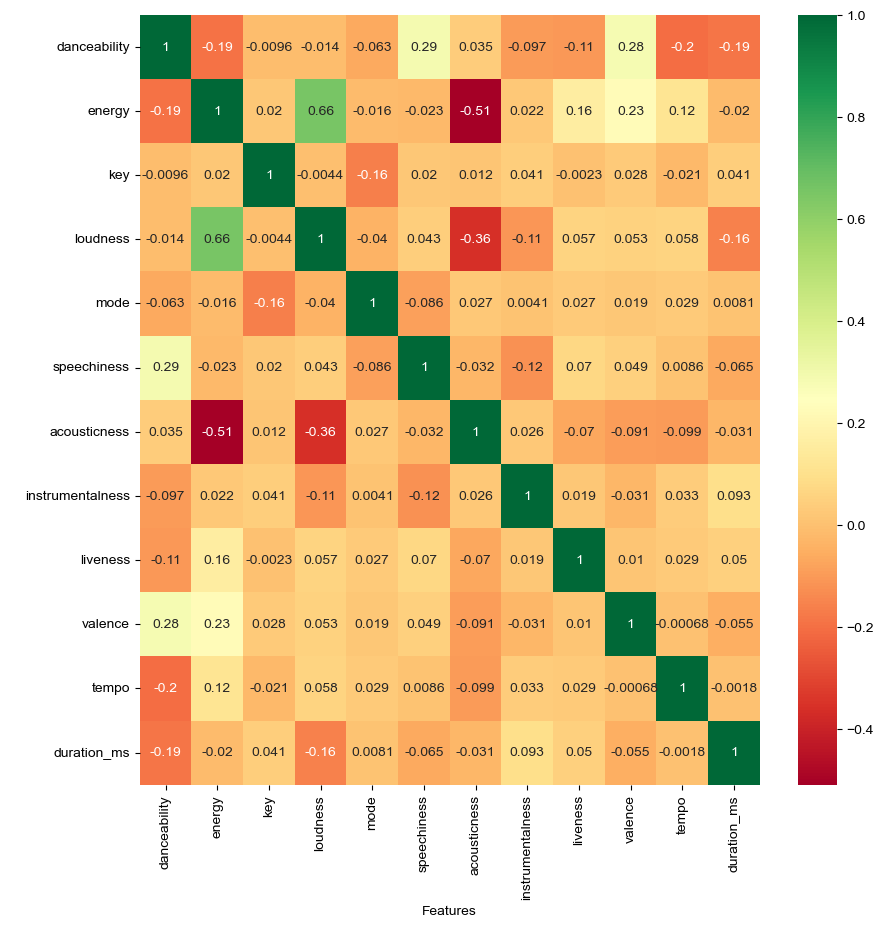

In [3]:
#绘制热力图观察特征之间的相关性
f,ax = plt.subplots(figsize = (10,10)) 
sns.heatmap(data.loc[:,['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms']].corr(), annot = True, fmt = '.2g', cmap = 'RdYlGn', ax= ax)
sns.set(font_scale = 0.75) 
plt.xlabel('Features')
plt.show()

# 一、数据预处理 - 归一化、标准化和正交化
### 1.1: 数据归一化、标准化（1分）
请手动实现数据归一化、标准化函数，这部分不允许使用sklearn中的相关函数。
- 请实现函数normalize_data对数据进行归一化处理，将数据的取值范围缩放到[0, 1]。
- 实现函数standardize_data对数据进行标准化处理，使每个特征的均值为0，标准差为1。

In [22]:
import numpy as np
np.random.seed(1)
data = np.random.rand(100,2) * 100

In [23]:

def normalize(data, axis=None):
    # TODO:
    
def standardize(data, axis=None):
    # TODO:
    

normalized_data = np.stack([normalize(data[:, i], axis=0) for i in range(data.shape[1])], axis=1)
standardized_data = np.stack([standardize(data[:, i], axis=0) for i in range(data.shape[1])], axis=1)


# Use sklearn functions to compare results
from sklearn.preprocessing import MinMaxScaler, StandardScaler

min_max_scaler = MinMaxScaler()
std_scaler = StandardScaler()

normalized_data_sklearn = min_max_scaler.fit_transform(data)
standardized_data_sklearn = std_scaler.fit_transform(data)

assert np.allclose(normalized_data, normalized_data_sklearn)
assert np.allclose(standardized_data, standardized_data_sklearn)

### 1.2: 数据正交化（0.5分）
请使用sklearn中的PCA得到数据正交化结果

In [24]:
from sklearn.decomposition import PCA

# TODO:

### 1.3 结果可视化（1.5分）
请使用matplotlib中的二维散点图可视化三者对数据处理后得到的结果

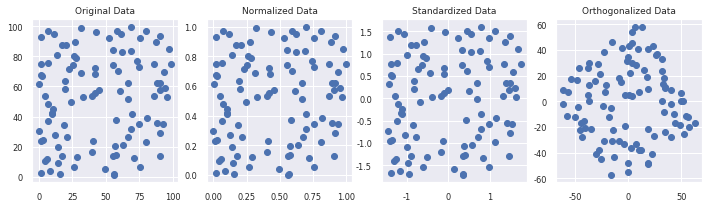

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3))
plt.rc('axes', unicode_minus=False)
# Plot original data
plt.subplot(1, 4, 1)

# TODO:

# Plot normalized data
plt.subplot(1, 4, 2)
# TODO:

# Plot standardized data
plt.subplot(1, 4, 3)
# TODO:

# Plot orthogonalized data
plt.subplot(1, 4, 4)
# TODO:

plt.show()

### 1.4 对比归一化、标准化和正交化处理对K-means聚类的影响（2分）
对原始数据、归一化处理后的数据、标准化处理后的数据和正交化处理后的数据分别进行K-means聚类，聚集成三类。比较四种数据处理方法对聚类效果的影响。请使用[轮廓系数（Silhouette Score）](https://zhuanlan.zhihu.com/p/530944459)评估聚类结果的质量。

Silhouette Score (Original Data): 0.406195778544729
Silhouette Score (Normalized Data): 0.40609375798356984
Silhouette Score (Standardized Data): 0.4041223890820541
Silhouette Score (Orthogonalized Data): 0.406195778544729


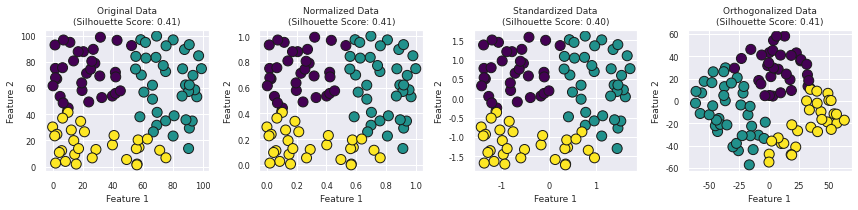

In [26]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = 3
random_state = 20230403

# TODO:
# Original data


# Normalized data


# Standardized data


# Orthogonalized data


# Output silhouette scores
print("Silhouette Score (Original Data):", silhouette_orig)
print("Silhouette Score (Normalized Data):", silhouette_norm)
print("Silhouette Score (Standardized Data):", silhouette_std)
print("Silhouette Score (Orthogonalized Data):", silhouette_orth)

# Visualization
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
axes = axes.ravel()

datasets = [data, normalized_data, standardized_data, orthogonalized_data]
titles = ["Original Data", "Normalized Data", "Standardized Data", "Orthogonalized Data"]
cluster_labels = [y_pred_orig, y_pred_norm, y_pred_std, y_pred_orth]

for i, (ax, dataset, title, labels) in enumerate(zip(axes, datasets, titles, cluster_labels)):
    ax.scatter(dataset[:, 0], dataset[:, 1], c=labels, cmap='viridis', edgecolors='k', s=100)
    ax.set_title(f"{title}\n(Silhouette Score: {silhouette_score(dataset, labels):.2f})")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()

# 二、电影推荐
推荐系统的应用范围很广，其中协同过滤是基础的一种，由于1M数据计算相似度矩阵易遇上内存问题，我们将在MovieLens 100k上实现简单的协同过滤（User-based/Item-Based）。

#### 读取数据

user数， movies数目， 决定了rating矩阵大小

In [27]:
import numpy as np
import pandas as pd

# Reading ratings file
ratings = pd.read_csv('data/ratings2.csv',  encoding='latin-1', usecols=['user_id', 'movie_id', 'rating', 'timestamp'])

# Reading users file
users = pd.read_csv('data/users.csv', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv('data/movies.csv',  encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [28]:
n_users = ratings.user_id.unique().shape[0]
n_movies = ratings.movie_id.unique().shape[0]
print ('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_movies))
ratings.describe()

Number of users = 6040 | Number of movies = 3706


,user_id,movie_id,rating,timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


#### 使用Sklearn 将一部分数据分为测试集

In [29]:
from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(ratings, test_size=0.25, random_state=1)

#### 2.1 生成User-Movies二维rating矩阵（0.5分）
仿照数据矩阵的生成，生成测试集矩阵

In [30]:
# 填写数据矩阵
train_data_matrix = np.array(train_data.pivot_table('rating', index='user_id', columns='movie_id', aggfunc='mean').fillna(0))

#TODO: 填写测试集矩阵


train_data_matrix[0:3,:] #每行为一个用户的观影评分向量

array([[5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### 2.2 计算  user-user 相似度矩阵  和 item-item 相似度矩阵（0.5分）
计算相似度矩阵，可以使用[pairwise_distances](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html#sklearn.metrics.pairwise_distances)

In [31]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')   # 用户

#TODO: 生成电影相似度矩阵


assert user_similarity.shape == (6040, 6040) 
assert item_similarity.shape == (3682, 3682)

#### 2.3 通过相似度矩阵进行预测
基于课件上已经实现的预测函数，对电影的数据做中心化，观察结果有无差异（2分）

In [32]:
def predict(train_ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = train_ratings.mean(axis=1) # 平均分
        ratings_diff = (train_ratings - mean_user_rating[:, np.newaxis]) # 评分向量中心化，
        # 通过相似度矩阵生成推荐，然后再把中心偏置加回来
        pred = mean_user_rating[:, np.newaxis] + \
            similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T #  user_sim
        
    elif type == 'item':
        pred = train_ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)]) # item_sim    
        #TODO: 这里尝试对电影的属性做一下中心化，观察结果数据有无改善
        
    return pred

item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

print(user_prediction.shape)
print(item_prediction.shape)

(6040, 3672)
(6040, 3672)


#### 评测
有很多评估指标，但其中一个最流行的指标是**根平均平方误差（RMSE）**，用于评估预测评级的准确性。本题将使用sklearn的**均方误差（MSE）**，RMSE只是MSE的平方根。

$$\mathit{RMSE} =\sqrt{\frac{1}{N} \sum (x_i -\hat{x_i})^2}$$

使用sklearn的**平均误差**函数作为验证指标，比较基于用户的协同过滤和基于项目的协同过滤，看起来基于用户的协同过滤的结果更好。

In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()  # 推荐结果 与 ground truth比较
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    errorR = sqrt(mean_squared_error(prediction, ground_truth))
    
    return errorR

print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 3.5276786698950477
Item-based CF RMSE: 3.5505138013306325


#### 2.4 用SVD分解和NMF分解的方法实现协同过滤
NMF分解的方法实现协同过滤已经实现，实现SVD分解的方法，推荐使用sklearn中的[TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html#sklearn.decomposition.TruncatedSVD)来实现，可以尝试调整参数能否取得更优的效果。（1分）

In [34]:
# 运行并观察结果
from sklearn.decomposition import NMF
model = NMF(13)                     # 13是调参调出来的
W = model.fit_transform(train_data_matrix)
H = model.components_
nmf_user_prediction = W @ H

#TODO：用SVD实现推荐及评测：


print('notdo-anything CF RMSE: ' + str(rmse(train_data_matrix, test_data_matrix)))
print('nmf-user-based CF RMSE: ' + str(rmse(nmf_user_prediction, test_data_matrix)))
print('svd-user-based CF RMSE: ' + str(rmse(svd_user_prediction, test_data_matrix)))


notdo-anything CF RMSE: 3.6339989459206152
nmf-user-based CF RMSE: 3.51907048348521
svd-user-based CF RMSE: 3.5371341850425604


#### 2.5（选做） 评价方案设计
本题采用了rmse作为评价指标，这种评价指标有什么问题？能否设计一种更好的评价方案（简单说明思路和道理+实现）（1分）

In [35]:
#TODO: 设计评价方案

# 三、特征工程与特征筛选
本题使用第0题的歌曲数据集songs.csv。我们查看第0题的数据分布后，尝试筛选特征进行歌曲分类。
### 3.1 只使用danceability进行分类
阅读代码，学习如何使用使用[Logistic](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)回归对歌曲种类进行分类，仅使用danceability特征。

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = pd.read_csv('./data/songs.csv')
X = data[['danceability']]
y = data['playlist_genre']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 实现Logistic回归分类器的训练和预测
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 计算并输出准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (danceability only):", accuracy)


Accuracy (danceability only): 0.5277777777777778


### 3.2 使用danceability、energy、key、speechiness、duration_ms共同进行分类（1分）

看起来，以上几个特征是还不错的选择。仿照3.1中的代码使用支持[向量机（SVM）](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm)对歌曲种类进行分类，使用danceability、energy、key、speechiness、duration_ms特征。



In [37]:
from sklearn.svm import SVC

#TODO: 完成对数据特征的筛选


# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#TODO: 实现支持向量机分类器的训练和预测


# 计算并输出准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (multiple features):", accuracy)


Accuracy (multiple features): 0.45


### 3.3（选做）特征筛选（1分）
对于音频特征，12个维度有点太过冗余了，实则12个特征全部直接使用效果也不好。我们如何选择出最合适的音频特征（3～5个）？应该对特征做什么样处理？参考第0题的可视化结果，寻找最佳特征组合，并以合理方式处理特征，在注释里写明选择的理由和处理的方式。要求最后打印在测试集上的classification_report和confusion matrix。在这一问中你可以只使用音频特征来进行朴素贝叶斯分类，也可以用你的方法结合音频和歌词文本特征。
提示：可以对比自己筛选出的特征与sklearn.feature_selection中的[SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)函数筛选出的特征的效果。（以代码实现为主，不必纠结准确率）

In [38]:
from sklearn.feature_selection import SelectKBest
# TODO: